# Getting started

In [1]:
import skimage
import matplotlib.pyplot as plt

In [2]:
from skimage import data
camera = data.camera()

In [3]:
print(camera)

[[156 157 160 ..., 152 152 152]
 [156 157 159 ..., 152 152 152]
 [158 157 156 ..., 152 152 152]
 ..., 
 [121 123 126 ..., 121 113 111]
 [121 123 126 ..., 121 113 111]
 [121 123 126 ..., 121 113 111]]


In [6]:
type(camera)

numpy.ndarray

In [8]:
camera.shape

(512, 512)

In [11]:
coins = data.coins()
from skimage import filters
threshold_value = filters.threshold_otsu(coins)
threshold_value

107

In [12]:
coins

array([[ 47, 123, 133, ...,  14,   3,  12],
       [ 93, 144, 145, ...,  12,   7,   7],
       [126, 147, 143, ...,   2,  13,   3],
       ..., 
       [ 81,  79,  74, ...,   6,   4,   7],
       [ 88,  82,  74, ...,   5,   7,   8],
       [ 91,  79,  68, ...,   4,  10,   7]], dtype=uint8)

In [5]:
import os
filename = os.path.join(skimage.data_dir, 'moon.png')
from skimage import io
moon = io.imread(filename)

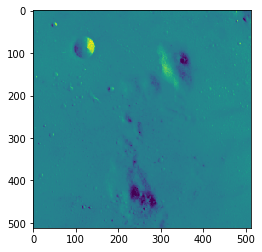

In [6]:
%matplotlib inline
plt.imshow(moon)

# A crash course on Numpy Images

En esta parte vuelven a importar data de skimage y declaran la variable 'camera'. Estos pasos ya fueron realizados aquí.

In [18]:
camera.size

262144

In [19]:
camera.min(), camera.max()

(0, 255)

In [20]:
camera.mean()

118.31400299072266

## NumPy indexing

In [21]:
camera[10, 20]

153

In [23]:
camera[3, 10] = 0

In [24]:
camera[3, 10]

0

In [25]:
#Poner en 0 las primeras diez líneas
camera[:10] = 0

In [26]:
mask = camera < 87
mask

array([[ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       [ True,  True,  True, ...,  True,  True,  True],
       ..., 
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]], dtype=bool)

In [27]:
#Poner en blanco todos los pixeles que sean menores que 87
camera[mask] = 255

In [28]:
camera

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111],
       [121, 123, 126, ..., 121, 113, 111]], dtype=uint8)

In [7]:
import numpy as np
inds_r = np.arange(len(camera))
inds_c = 4 * inds_r % len(camera)
camera[inds_r, inds_c] = 0

In [32]:
inds_r, inds_c

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [15]:
nrows, ncols = camera.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
camera[outer_disk_mask] = 0

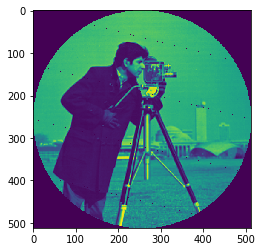

In [16]:
%matplotlib inline
plt.imshow(camera)

In [17]:
lower_half = row > cnt_row
lower_half_disk = np.logical_and(lower_half, outer_disk_mask)
camera = data.camera()
camera[lower_half_disk] = 0

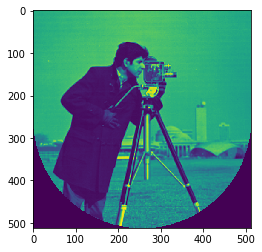

In [18]:
%matplotlib inline
plt.imshow(camera)

## Color images

In [40]:
cat = data.chelsea()
type(cat)

numpy.ndarray

In [41]:
cat.shape

(300, 451, 3)

In [42]:
cat[10, 20]

array([151, 129, 115], dtype=uint8)

In [43]:
#Poner un pixel en negro
cat[50, 60] = 0

In [44]:
#Poner los valores (RGB) del pixel
cat[50, 61] = [0, 255, 0]

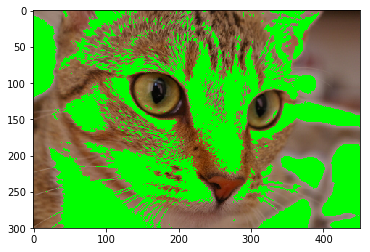

In [45]:
#Aplicar una máscara 2D a la imagen
reddish = cat[:, :, 0] > 160
cat[reddish] = [0, 255, 0]
plt.imshow(cat)

## Coordinate conventions

In [9]:
#Imagenes 3D
im3d = np.random.rand(100, 1000, 1000)

In [10]:
from skimage import morphology
from scipy import ndimage as ndi

In [ ]:
seeds = ndi.label(im3d < 0.1)[0]
ws = morphology.watershed(im3d, seeds)

In [12]:
from skimage import segmentation
slics = segmentation.slic(im3d, spacing=[5, 1, 1], multichannel=False)
slics

array([[[ 0,  0,  0, ...,  9,  9,  9],
        [ 0,  0,  0, ...,  9,  9,  9],
        [ 0,  0,  0, ...,  9,  9,  9],
        ..., 
        [90, 90, 90, ..., 99, 99, 99],
        [90, 90, 90, ..., 99, 99, 99],
        [90, 90, 90, ..., 99, 99, 99]],

       [[ 0,  0,  0, ...,  9,  9,  9],
        [ 0,  0,  0, ...,  9,  9,  9],
        [ 0,  0,  0, ...,  9,  9,  9],
        ..., 
        [90, 90, 90, ..., 99, 99, 99],
        [90, 90, 90, ..., 99, 99, 99],
        [90, 90, 90, ..., 99, 99, 99]],

       [[ 0,  0,  0, ...,  9,  9,  9],
        [ 0,  0,  0, ...,  9,  9,  9],
        [ 0,  0,  0, ...,  9,  9,  9],
        ..., 
        [90, 90, 90, ..., 99, 99, 99],
        [90, 90, 90, ..., 99, 99, 99],
        [90, 90, 90, ..., 99, 99, 99]],

       ..., 
       [[ 0,  0,  0, ...,  9,  9,  9],
        [ 0,  0,  0, ...,  9,  9,  9],
        [ 0,  0,  0, ...,  9,  9,  9],
        ..., 
        [90, 90, 90, ..., 99, 99, 99],
        [90, 90, 90, ..., 99, 99, 99],
        [90, 90, 90, ..., 99

In [14]:
type(slics)

numpy.ndarray

## Notes on any order

In [15]:
def in_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[0])):
        arr[plane, :, :] *= scalar

def out_of_order_multiply(arr, scalar):
    for plane in list(range(arr.shape[2])):
        arr[:, :, plane] *= scalar
        
import time
im3d = np.random.rand(100, 1024, 1024)
t0 = time.time(); x = in_order_multiply(im3d, 5); t1 = time.time()
print("%.2f seconds" % (t1 - t0))  

0.08 seconds


In [17]:
im3d_t = np.transpose(im3d).copy()
print(im3d_t.shape)

s0 = time.time(); x = out_of_order_multiply(im3d, 5); s1 = time.time()
print("%.2f seconds" % (s1 - s0))  

(1024, 1024, 100)
1.60 seconds


In [18]:
print("Speedup: %.1fx" % ((s1 - s0) / (t1 - t0)))

Speedup: 21.1x


# Image data types and what they mean

In [22]:
from skimage import img_as_float
image = np.arange(0, 50, 10, dtype=np.uint8)
print(image)
#Los valores estarán fuera del rango
print(image.astype(np.float))

[ 0 10 20 30 40]
[  0.  10.  20.  30.  40.]


In [20]:
print(img_as_float(image))

[ 0.          0.03921569  0.07843137  0.11764706  0.15686275]


In [24]:
from skimage import img_as_ubyte
image = np.array([0, 0.5, 1], dtype=float)
#Se mostrará un warning por posible pérdida de calidad al convertir la imagen
img_as_ubyte(image)

/home/ericksav22/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint8
  .format(dtypeobj_in, dtypeobj_out))


array([  0, 128, 255], dtype=uint8)

In [27]:
import warnings
image = np.array([0, 0.5, 1], dtype=float)
#Se ignorará el warning
with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    img_as_ubyte(image)

image

array([ 0. ,  0.5,  1. ])

In [28]:
from skimage import data
from skimage.transform import rescale
image = data.coins()
image.dtype, image.min(), image.max(), image.shape

(dtype('uint8'), 1, 252, (303, 384))

Se preservará el rango al hacer el rescalamiento de la imagen

In [29]:
rescaled = rescale(image, 0.5)
(rescaled.dtype, np.round(rescaled.min(), 4), np.round(rescaled.max(), 4), rescaled.shape)

/home/ericksav22/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(dtype('float64'), 0.0147, 0.9456, (152, 192))

In [30]:
rescaled = rescale(image, 0.5, preserve_range=True)
(rescaled.dtype, np.round(rescaled.min()), np.round(rescaled.max()), rescaled.shape)

/home/ericksav22/anaconda3/lib/python3.6/site-packages/skimage/transform/_warps.py:84: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "


(dtype('float64'), 4.0, 241.0, (152, 192))

## Output types

/home/ericksav22/anaconda3/lib/python3.6/site-packages/skimage/util/dtype.py:122: UserWarning: Possible precision loss when converting from float64 to uint16
  .format(dtypeobj_in, dtypeobj_out))


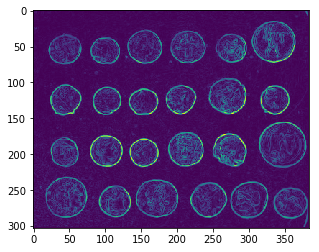

In [32]:
from skimage import img_as_uint
from skimage.filters import roberts, sobel, scharr, prewitt
out = img_as_uint(sobel(image))
plt.imshow(out)

Convierte de BRG A RGB o viceversa, esto es útil con imágenes de OpenCV

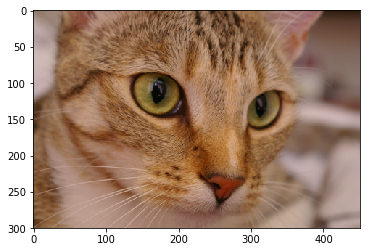

In [47]:
from skimage import data
cat = data.chelsea()
plt.imshow(cat)

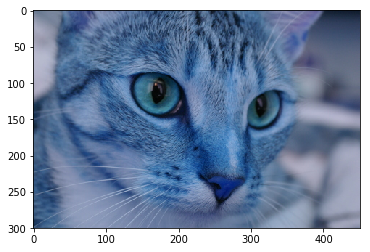

In [44]:
cat = cat[:, :, ::-1]
plt.imshow(cat)

### Using an image from OpenCV with skimage

OpenCV usa imágenes como bytes, estas se pueden transformar a punto flotante de la siguiente manera:

In [ ]:
from skimage import img_as_float
image = img_as_float(any_opencv_image)

## Image processing pipeline

Este comportamiento de tipo permite enlazar cualquier función de skimage sin preocuparse por el tipo de imagen. Por otro lado, si desea usar una función personalizada que requiera un tipo de dato en particular, se debe llamar a una de las funciones de conversión de tipo (aquí, func1 y func2 son funciones de skimage):

In [ ]:
from skimage import img_as_float
image = img_as_float(func1(func2(image)))
processed_image = custom_func(image)

Mejor aún, tu puedes convertir la imagen internamente y usar un proceso simplificado en una línea código.

In [ ]:
def custom_func(image):
    image = img_as_float(image)
    # Haz algo

processed_image = custom_func(func1(func2(image)))

## Rescaling intensity values

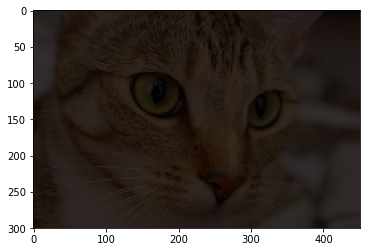

In [46]:
from skimage import exposure
image = exposure.rescale_intensity(cat, in_range=(0, 2**10 - 1))
plt.imshow(image)

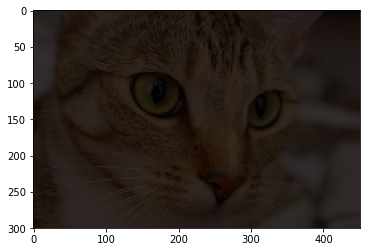

In [49]:
image = exposure.rescale_intensity(cat, in_range='uint10')
plt.imshow(image)

## Note about negative values

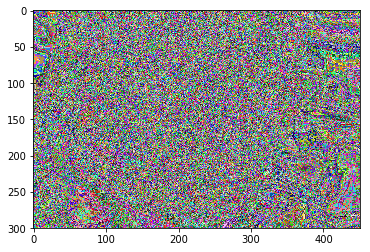

In [50]:
image = exposure.rescale_intensity(cat, out_range=(0, 2**31 - 1))
img_uint8 = img_as_ubyte(image)
plt.imshow(img_uint8)

## Image adjustment: transforming image content

Convirtiendo de RGB a HSV

In [53]:
import skimage.color as color
red_pixel_rgb = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2hsv(red_pixel_rgb)

array([[[ 0.,  1.,  1.]]])

In [54]:
dark_blue_pixel_rgb = np.array([[[0, 0, 100]]], dtype=np.uint8)
color.rgb2hsv(dark_blue_pixel_rgb)

array([[[ 0.66666667,  1.        ,  0.39215686]]])

In [55]:
pink_pixel_rgb = np.array([[[255, 100, 255]]], dtype=np.uint8)
color.rgb2hsv(pink_pixel_rgb)

array([[[ 0.83333333,  0.60784314,  1.        ]]])

Quitando el componente ALpha de una imagen RGBA

In [61]:
from skimage.color import rgba2rgb
from skimage import data
img_rgba = data.logo()
print(img_rgba)

[[[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 ..., 
 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]

 [[255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]
  ..., 
  [255 255 255 255]
  [255 255 255 255]
  [255 255 255 255]]]


In [62]:
img_rgb = rgba2rgb(img_rgba)
print(img_rgb)

[[[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  ..., 
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  ..., 
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  ..., 
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 ..., 
 [[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  ..., 
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  ..., 
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]

 [[ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  ..., 
  [ 1.  1.  1.]
  [ 1.  1.  1.]
  [ 1.  1.  1.]]]


Convertir imagen de color a escala de grises

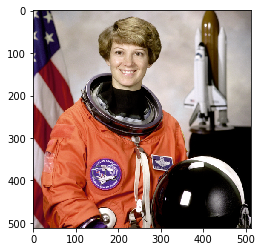

In [65]:
from skimage.color import rgb2gray
from skimage import data
img = data.astronaut()
plt.imshow(img)

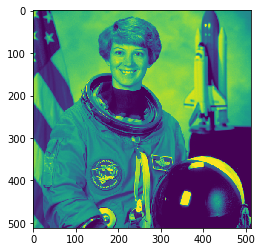

In [66]:
img_gray = rgb2gray(img)
plt.imshow(img_gray)

In [68]:
red_pixel = np.array([[[255, 0, 0]]], dtype=np.uint8)
color.rgb2gray(red_pixel)

array([[ 0.2125]])

In [69]:
green_pixel = np.array([[[0, 255, 0]]], dtype=np.uint8)
color.rgb2gray(green_pixel)

array([[ 0.7154]])

Inversión de una imagen

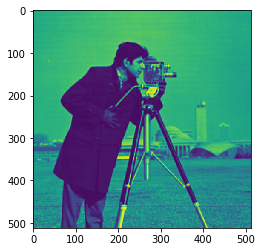

In [70]:
from skimage import util
img = data.camera()
plt.imshow(img)

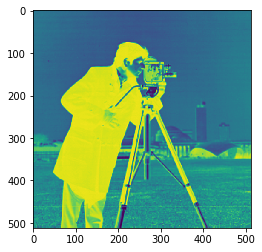

In [71]:
inverted_img = util.invert(img)
plt.imshow(inverted_img)

Pintar imágenes con paletas de colores

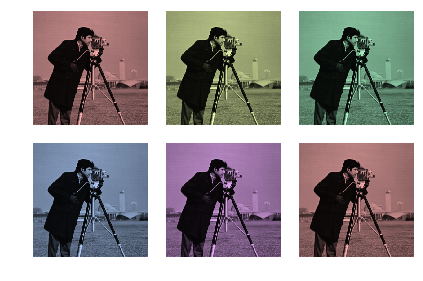

In [79]:
hue_rotations = np.linspace(0, 1, 6)

fig, axes = plt.subplots(nrows=2, ncols=3, sharex=True, sharey=True)
grayscale_image = img_as_float(data.camera()[::2, ::2])
image = color.gray2rgb(grayscale_image)

for ax, hue in zip(axes.flat, hue_rotations):
    # Turn down the saturation to give it that vintage look.
    tinted_image = colorize(image, hue, saturation=0.3)
    ax.imshow(tinted_image, vmin=0, vmax=1)
    ax.set_axis_off()
    ax.set_adjustable('box-forced')
fig.tight_layout()

## Contrast and exposure

In [80]:
image = np.array([[1, 3], [1, 1]])
exposure.histogram(image)

(array([3, 0, 1]), array([1, 2, 3]))

In [81]:
from skimage import exposure
text = data.text()
text.min(), text.max()

(10, 197)

In [82]:
better_contrast = exposure.rescale_intensity(text)
better_contrast.min(), better_contrast.max()

(0, 255)

In [83]:
moon = data.moon()
v_min, v_max = np.percentile(moon, (0.2, 99.8))
v_min, v_max

(10.0, 186.0)

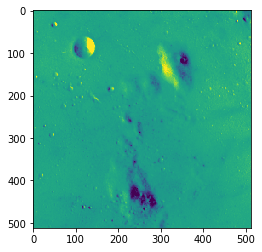

In [86]:
better_contrast = exposure.rescale_intensity(moon, in_range=(v_min, v_max))
plt.imshow(better_contrast)

## I/O Plugin Infrastructure

En esta parte se explica cómo crear plugins que usen la librería, para ello se generan dos archivos: $\textit{skimage/io/_plugins/mpl.py}$ y $\textit{skimage/io/_plugins/mpl.ini}$ los cuales deben llamarse igual, sólo que uno es con extensión .py y otro con extensión .ini
Dentro del archivo .ini se escribe la metadata del plugin

[mpl] <-- name of the plugin, may be anything
description = Matplotlib image I/O plugin
provides = imshow <-- a comma-separated list, one or more of
                      imshow, imsave, imread, _app_show

In [88]:
#Definición del arhcivo .py

import matplotlib.pyplot as plt

def imshow(img):
    plt.imshow(img)
    
def _app_show():
    plt.show()

In [89]:
#Se pueden busar plugins existentes
import skimage.io as io
io.find_available_plugins()

{'fits': ['imread', 'imread_collection'],
 'freeimage': ['imread', 'imsave', 'imread_collection'],
 'gdal': ['imread', 'imread_collection'],
 'gtk': ['imshow'],
 'imageio': ['imread', 'imsave', 'imread_collection'],
 'imread': ['imread', 'imsave', 'imread_collection'],
 'matplotlib': ['imshow', 'imread', 'imshow_collection', 'imread_collection'],
 'pil': ['imread', 'imsave', 'imread_collection'],
 'qt': ['imshow', 'imsave', 'imread', 'imread_collection'],
 'simpleitk': ['imread', 'imsave', 'imread_collection'],
 'test': ['imsave',
  'imshow',
  'imread',
  'imread_collection',
  'imshow_collection'],
 'tifffile': ['imread', 'imsave', 'imread_collection']}